<a href="https://colab.research.google.com/github/PrakhyatVerma/hackathon/blob/main/prakhyatverma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [25]:
df = pd.read_csv('test_set_features.csv')
pd.set_option('display.max_columns', None)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  float64
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [28]:
df = pd.read_csv('submission_format.csv')
pd.set_option('display.max_columns', None)
df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
...,...,...,...
26703,53410,0.5,0.7
26704,53411,0.5,0.7
26705,53412,0.5,0.7
26706,53413,0.5,0.7


<Figure size 640x480 with 0 Axes>

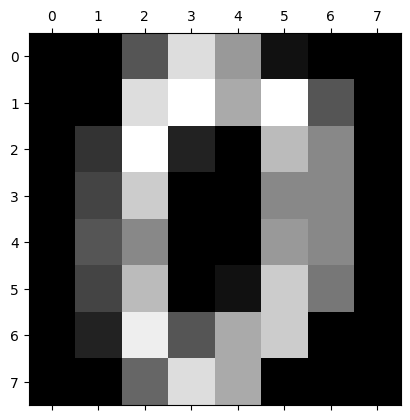

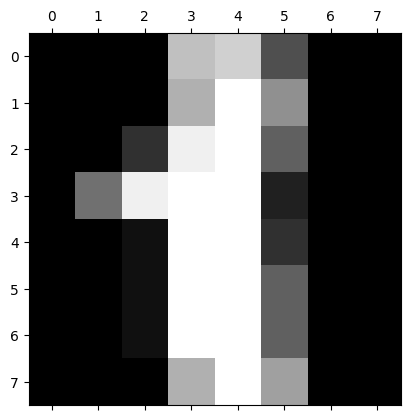

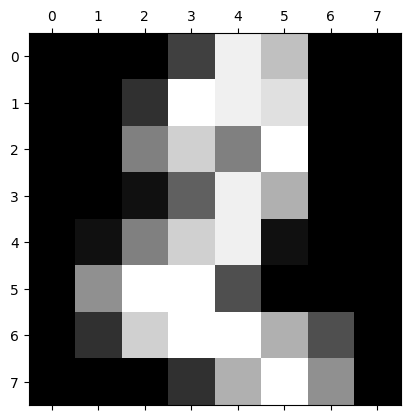

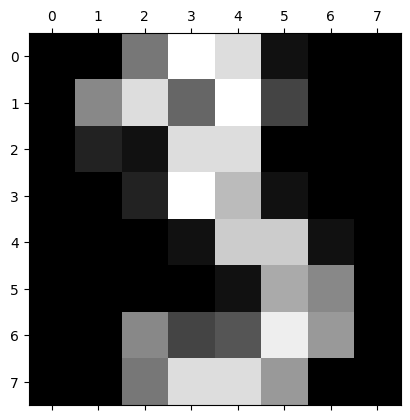

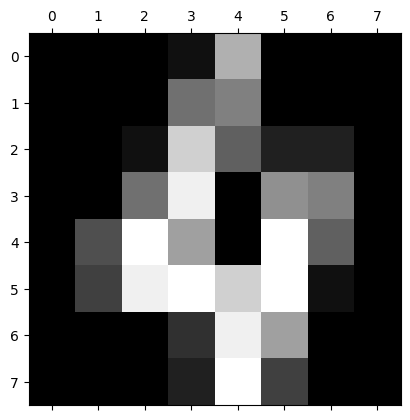

In [32]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [ ]:
df= pd.read_csv('training_set_features.csv')
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [27]:
df = pd.read_csv('training_set_labels.csv')
pd.set_option('display.max_columns', None)
df

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


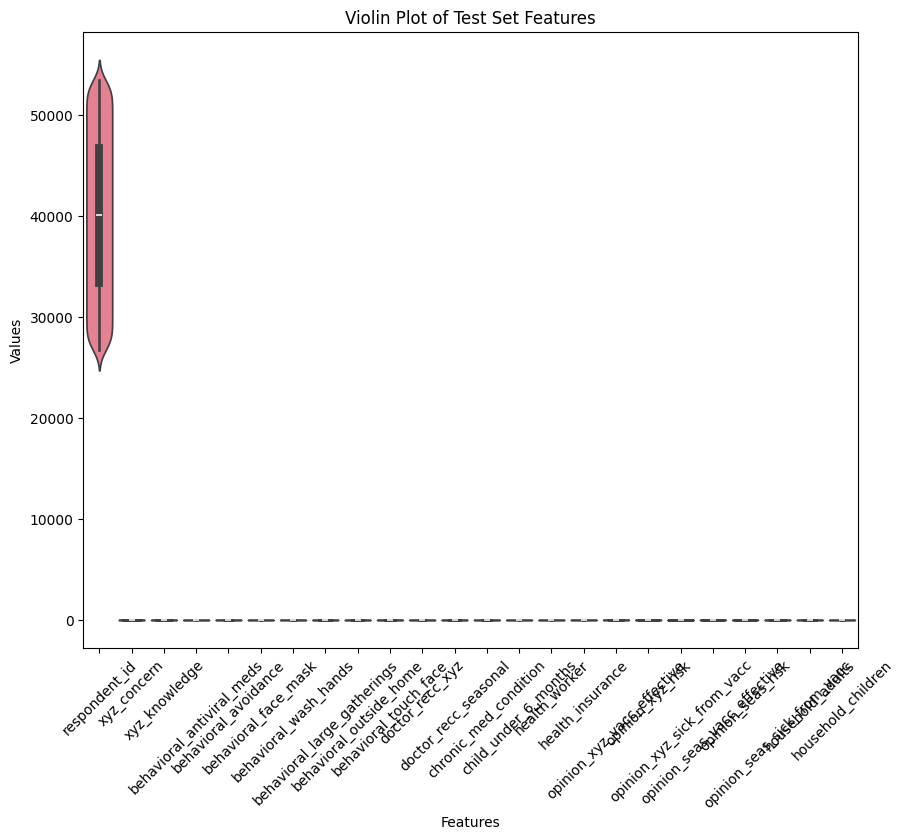

In [29]:


import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('test_set_features.csv')

# Create the violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(data=df)

# Add title and labels
plt.title('Violin Plot of Test Set Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


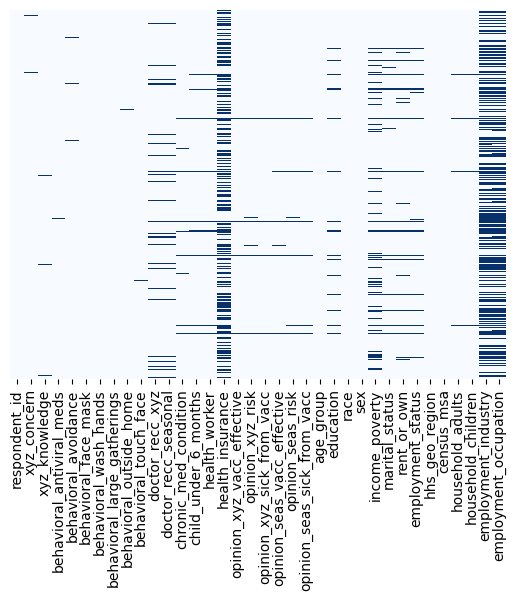

In [ ]:
feature_cols = [col for col in df.columns if col not in ['training_set_features.csv']]
target_cols = ['training_set_features.csv']

cat_cols = [col for col in feature_cols if df[col].dtype == 'O']
cont_cols = [col for col in feature_cols if col not in cat_cols]
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False, xticklabels=df.columns);

In [30]:


from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='distance')

df[cont_cols] = knn_imputer.fit_transform(df[cont_cols])


In [22]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

# Load the data
df_train = pd.read_csv('training_set_features.csv')
df_test = pd.read_csv('test_set_features.csv')

# Select feature columns and target column
feature_cols = [
    'respondent_id', 'xyz_knowledge', 'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults',
    'household_children', 'employment_industry', 'employment_occupation'
]
target_col = 'xyz_concern'

X_train = df_train[feature_cols]
y_train = df_train[target_col]
X_test = df_test[feature_cols]
y_test = df_test[target_col]

# Handle missing values for numeric and categorical separately
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

X_train.loc[:, numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].mean())
X_test.loc[:, numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].mean())

X_train.loc[:, categorical_cols] = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
X_test.loc[:, categorical_cols] = X_test[categorical_cols].fillna(X_test[categorical_cols].mode().iloc[0])

# Drop rows with missing target values
X_train = X_train.loc[y_train.dropna().index]
y_train = y_train.dropna()

X_test = X_test.loc[y_test.dropna().index]
y_test = y_test.dropna()

# Create dummy variables for categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Convert data to float to avoid the "object" dtype issue
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Fit the multi-valued logistic regression model
model = sm.MNLogit(y_train, X_train)
result = model.fit()

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = y_pred_prob.idxmax(axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Optimization terminated successfully.
         Current function value: 1.178528
         Iterations 6
Accuracy: 0.45


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the test set
df_test = pd.read_csv('test_set_features.csv')

# Select feature columns and target column
feature_cols = [
    'respondent_id', 'xyz_knowledge', 'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults',
    'household_children', 'employment_industry', 'employment_occupation'
]
target_col = 'xyz_concern'

X_test = df_test[feature_cols]
y_test = df_test[target_col]

# Handle missing values for numeric and categorical separately
numeric_cols = X_test.select_dtypes(include=['number']).columns
categorical_cols = X_test.select_dtypes(include=['object']).columns

X_test.loc[:, numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].mean())
X_test.loc[:, categorical_cols] = X_test[categorical_cols].fillna(X_test[categorical_cols].mode().iloc[0])

# Drop rows with missing target values
X_test = X_test.loc[y_test.dropna().index]
y_test = y_test.dropna()

# Create dummy variables for categorical features
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test sets have the same columns
X_test, _ = X_test.align(X_train, join='left', axis=1, fill_value=0)

# Convert data to float to avoid the "object" dtype issue
X_test = X_test.astype(float)

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = y_pred_prob.idxmax(axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.45


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
df_train = pd.read_csv('training_set_features.csv')

# Define the feature columns and target column
feature_cols = [
    'respondent_id', 'xyz_knowledge', 'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'income_poverty', 'marital_status', 'rent_or_own',
    'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults',
    'household_children', 'employment_industry', 'employment_occupation'
]
target_col = 'xyz_concern'

# Prepare feature matrix X and target vector y
X = df_train[feature_cols]
y = df_train[target_col]

# Handle missing values
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

X.loc[:, numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
X.loc[:, categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

# Drop rows with missing target values
X = X.loc[y.dropna().index]
y = y.dropna()

# Create dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso regression
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Ridge regression
ridge = RidgeCV(cv=5).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Calculate mean squared error, bias, and variance for Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
bias_lasso = np.mean(y_pred_lasso - y_test)
variance_lasso = np.var(y_pred_lasso - y_test)

# Calculate mean squared error, bias, and variance for Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
bias_ridge = np.mean(y_pred_ridge - y_test)
variance_ridge = np.var(y_pred_ridge - y_test)

# Print the results
print("Lasso Regression:")
print("Mean squared error:", mse_lasso)
print("Bias:", bias_lasso)
print("Variance:", variance_lasso)

print("\nRidge Regression:")
print("Mean squared error:", mse_ridge)
print("Bias:", bias_ridge)
print("Variance:", variance_ridge)


Lasso Regression:
Mean squared error: 0.8393467570755833
Bias: 0.01288566478143908
Variance: 0.8391807167187235

Ridge Regression:
Mean squared error: 0.6802126596737039
Bias: 8.75595138556446e-06
Variance: 0.6802126595970371


In [ ]:
# prompt: now we have to scale our model on the basis of
# power transformer scaler

from sklearn.preprocessing import PowerTransformer

# Create the power transformer
power_transformer = PowerTransformer()

# Fit the transformer on the training data
power_transformer.fit(X_train)

# Transform both training and test data
X_train_transformed = power_transformer.transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

# Scale the target variable
y_train_scaled = power_transformer.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = power_transformer.transform(y_test.values.reshape(-1, 1))

# Now you can use the transformed data for training and testing your model


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
training_set = pd.read_csv('training_set_features.csv')
test_set = pd.read_csv('test_set_features.csv')

# Print column names to verify the target variable's name
print("Training set columns:", training_set.columns)
print("Test set columns:", test_set.columns)

# Assume the target variable's name is 'xyz_concern' or update it with the correct name
target_column = 'xyz_concern'  # Replace 'xyz_concern' with the correct column name if different

# Ensure the target column exists
if target_column not in training_set.columns or target_column not in test_set.columns:
    raise KeyError(f"'{target_column}' not found in one of the datasets. Please check the column names.")

X_train = training_set.drop(columns=target_column)
y_train = training_set[target_column]
X_test = test_set.drop(columns=target_column)
y_test = test_set[target_column]

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align the train and test set to have the same columns
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# Function to calculate bias and variance
def bias_variance_decomposition(model, X_train, y_train, X_test, y_test, alphas):
    mse_train = []
    mse_test = []
    bias_squared = []
    variance = []

    for alpha in alphas:
        model.set_params(alpha=alpha)
        model.fit(X_train, y_train)

        # Predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # MSE
        mse_train.append(mean_squared_error(y_train, y_pred_train))
        mse_test.append(mean_squared_error(y_test, y_pred_test))

        # Bias and Variance calculation
        avg_y_pred = np.mean(y_pred_test)
        bias_squared.append((avg_y_pred - np.mean(y_test))**2)
        variance.append(np.mean((y_pred_test - avg_y_pred)**2))

    return mse_train, mse_test, bias_squared, variance

# Define alphas
alphas = np.logspace(-4, 4, 100)

# Lasso regression
lasso = Lasso()
lasso_mse_train, lasso_mse_test, lasso_bias_squared, lasso_variance = bias_variance_decomposition(lasso, X_train, y_train, X_test, y_test, alphas)

# Ridge regression
ridge = Ridge()
ridge_mse_train, ridge_mse_test, ridge_bias_squared, ridge_variance = bias_variance_decomposition(ridge, X_train, y_train, X_test, y_test, alphas)

# Plot the bias-variance tradeoff for Lasso regression
plt.figure(figsize=(8, 6))
plt.plot(alphas, lasso_mse_test, label='MSE', c='r')
plt.plot(alphas, lasso_bias_squared, label='Bias^2', c='b')
plt.plot(alphas, lasso_variance, label='Variance', c='g')

plt.xlabel('Alpha')
plt.ylabel('Error')
plt.xscale('log')
plt.title('Bias-Variance Tradeoff for Lasso Regression')
plt.legend()
plt.show()

# Plot the bias-variance tradeoff for Ridge regression
plt.figure(figsize=(8, 6))
plt.plot(alphas, ridge_mse_test, label='MSE', c='r')
plt.plot(alphas, ridge_bias_squared, label='Bias^2', c='b')
plt.plot(alphas, ridge_variance, label='Variance', c='g')

plt.xlabel('Alpha')
plt.ylabel('Error')
plt.xscale('log')
plt.title('Bias-Variance Tradeoff for Ridge Regression')
plt.legend()
plt.show()

Training set columns: Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')
Test set columns: Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_

ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values